In [2]:
# === Environment Setup ===
#%load_ext autoreload
#%autoreload 2
%matplotlib inline

import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from main import run_all, plot_value_function, plot_search_policy, plot_posterior_beliefs

# Plotting Configuration
sns.set_theme(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14

In [55]:
# === Run Solver ===
print("Starting Solver... Please wait.")
params, policy = run_all()
print("Solver Finished! Model data is loaded into memory.")
print(f"   - Lambda Shape: {policy.lambda_f.shape}")
print(f"   - Value Function Shape: {policy.value_f.shape}")

Starting Solver... Please wait.
Step 1: Computing Expected Match Profits...
Step 2: Computing Bayesian Beliefs...
Step 3: Solving Value Function...
  > Solving Foreign Policy (5D Full Storage)...


Foreign HJB Process: 100%|██████████| 3927/3927 [00:36<00:00, 107.21it/s]


  > Solving Home Policy ...


Home HJB Progress: 100%|██████████| 4879/4879 [00:24<00:00, 202.78it/s]

Solver Finished! Model data is loaded into memory.
   - Lambda Shape: (21, 21, 41, 17, 15)
   - Value Function Shape: (21, 21, 41, 17, 15)


In [67]:
# === Plot Value Function ===
def interactive_value_dashboard_3d(params, policy):
    # range of values
    phi_max   = params.phi_size * 2
    macro_max = params.x_size * 2
    net_max   = params.net_size - 1

    # widget
    w_phi = widgets.IntSlider(min=0, max=phi_max, value=phi_max//2, description='Phi')
    w_macro = widgets.IntSlider(min=0, max=macro_max, value=macro_max//2, description='Macro')
    w_net = widgets.IntSlider(min=0, max=net_max, value=0, description='Net (m)')
    # 3D rotation
    w_azim = widgets.IntSlider(min=-180, max=180, step=5, value=-60, description='Rotate 3D')
    w_elev = widgets.IntSlider(min=0, max=90, step=5, value=30, description='Elevate 3D')

    # wrapper
    def update(phi, macro, net, azim, elev):
        plot_value_function(
            params, policy, phi, macro, net,
            elev=elev, azim=azim
        )
    
    # interactive
    interact(update, 
             phi=w_phi, macro=w_macro, net=w_net, 
             azim=w_azim, elev=w_elev)



print("Plotting Value Function...")
interactive_value_dashboard_3d(params, policy)

Plotting Value Function...


interactive(children=(IntSlider(value=8, description='Phi', max=16), IntSlider(value=7, description='Macro', m…

Plotting Bayesian Beliefs Evolution...


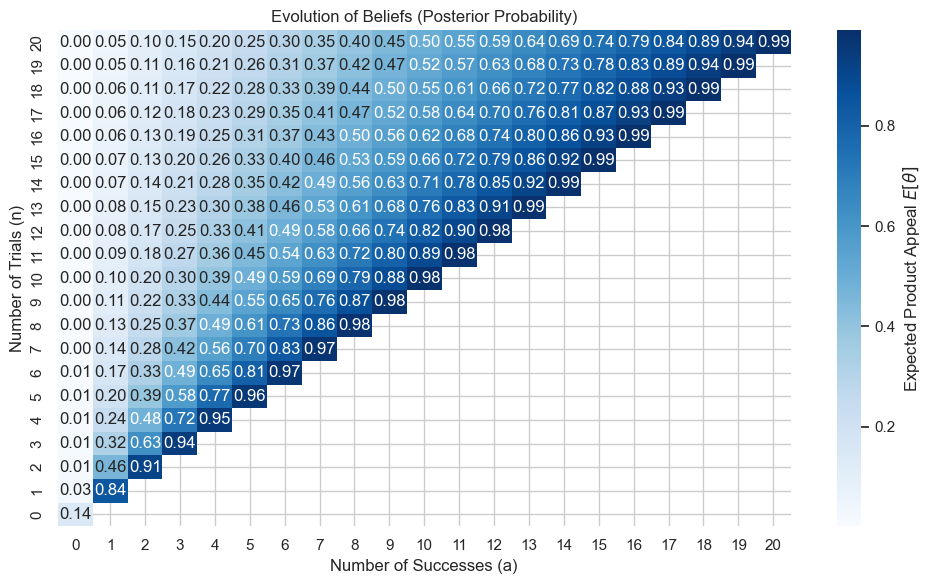

In [68]:
# === Plot Posterior Beliefs ===
print("Plotting Bayesian Beliefs Evolution...")
plot_posterior_beliefs(params, policy)

In [69]:
# === Plot Search Policy ===
def interactive_search_dashboard(params, policy):

    # interval
    phi_max = params.phi_size * 2
    macro_max = params.x_size * 2
    net_max = params.net_size - 1

    # define the widgets
    slider_phi = widgets.IntSlider(min=0, max=phi_max, step=1, value=phi_max//2, description='Productivity')
    slider_macro = widgets.IntSlider(min=0, max=macro_max, step=1, value=macro_max//2, description='Macro')
    slider_net = widgets.IntSlider(min=0, max=net_max, step=1, value=0, description='Network')

    # Wrapper
    def update_plot(phi, macro, net):
        plot_search_policy(params, policy, phi, macro, net)

    # start interactive display
    interact(update_plot,
             phi = slider_phi,
             macro = slider_macro,
             net = slider_net)
    
print("Plotting Search Intensity Heatmap...")
interactive_search_dashboard(params, policy)

Plotting Search Intensity Heatmap...


interactive(children=(IntSlider(value=8, description='Productivity', max=16), IntSlider(value=7, description='…